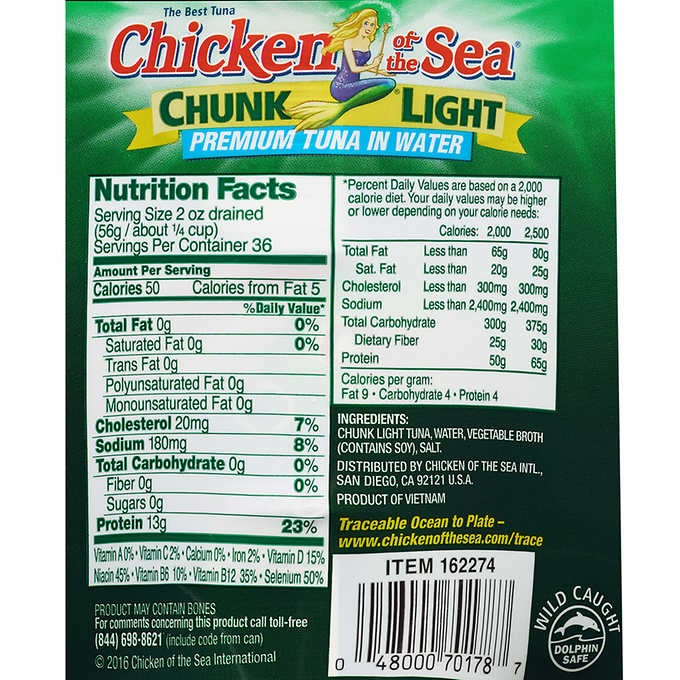

19.99
<p id='0' style='font-size:16px'>The Best Tuna</p><br><p id='1' style='font-size:20px'>Chicken the Sea <br>of</p><br><p id='2' style='font-size:22px'>CHUNK LIGHT</p><br><p id='3' style='font-size:20px'>PREMIUM TUNA IN WATER</p><br><p id='4' style='font-size:20px'>Nutrition Facts</p><br><p id='5' style='font-size:18px'>Serving Size 2 oz drained<br>(56g/about 1/4 cup)<br>Servings Per Container 36</p><br><table id='7' style='font-size:18px'><thead></thead><tbody><tr><td>Calories 50</td><td>Calories from Fat 5</td></tr><tr><td colspan="2">%Daily Value</td></tr><tr><td>Total Fat 0g</td><td>0%</td></tr><tr><td>Saturated Fat 0g</td><td>0%</td></tr><tr><td colspan="2">Trans Fat 0g</td></tr><tr><td>Polyunsaturated Fat 0g</td><td></td></tr><tr><td>Monounsaturated Fat 0g</td><td></td></tr><tr><td>Cholesterol 20mg</td><td>7%</td></tr><tr><td>Sodium 180mg</td><td>8%</td></tr><tr><td>Total Carbohydrate 0g</td><td>0%</td></tr><tr><td>Fiber 0g</td><td>0%</td></tr><tr><td>Sugars 0g</td><td></td><

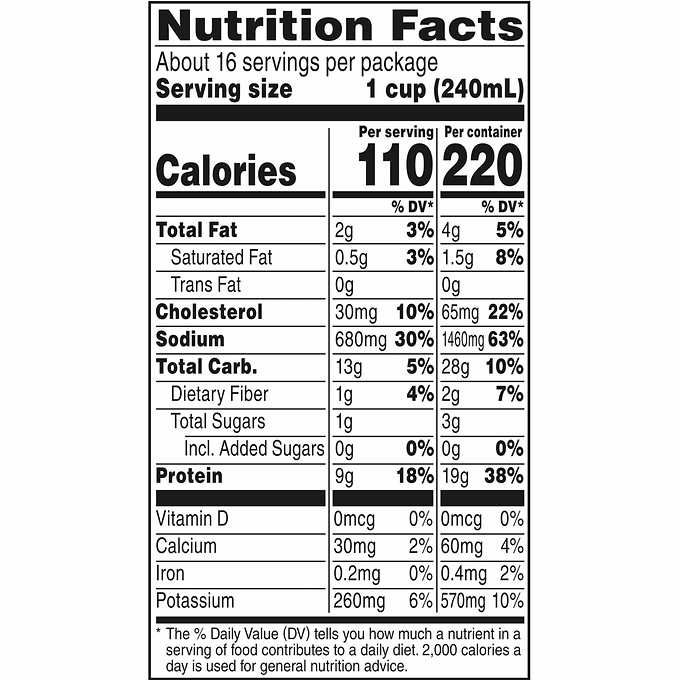

15.99
<p id='0' style='font-size:20px'>Nutrition Facts</p><table id='2' style='font-size:16px'><thead></thead><tbody><tr><td>Calories</td><td colspan="2">Per serving 110</td><td colspan="2">Per container 220</td></tr><tr><td></td><td colspan="2">%DV*</td><td colspan="2">%DV*</td></tr><tr><td>Total Fat</td><td>2g</td><td>3%</td><td>4g</td><td>5%</td></tr><tr><td>Saturated Fat</td><td>0.5g</td><td>3%</td><td>1.5g</td><td>8%</td></tr><tr><td>Trans Fat</td><td colspan="2">0g</td><td colspan="2">0g</td></tr><tr><td>Cholesterol</td><td>30mg</td><td>10%</td><td>65mg</td><td>22%</td></tr><tr><td>Sodium</td><td>680mg</td><td>30%</td><td>1460mg</td><td>63%</td></tr><tr><td>Total Carb.</td><td>13g</td><td>5%</td><td>28g</td><td>10%</td></tr><tr><td>Dietary Fiber</td><td>1g</td><td>4%</td><td>2g</td><td>7%</td></tr><tr><td>Total Sugars</td><td colspan="2">1g</td><td colspan="2">3g</td></tr><tr><td>Incl. Added Sugars</td><td>0g</td><td>0%</td><td>0g</td><td>0%</td></tr><tr><td>Protein</td><td>9g</t

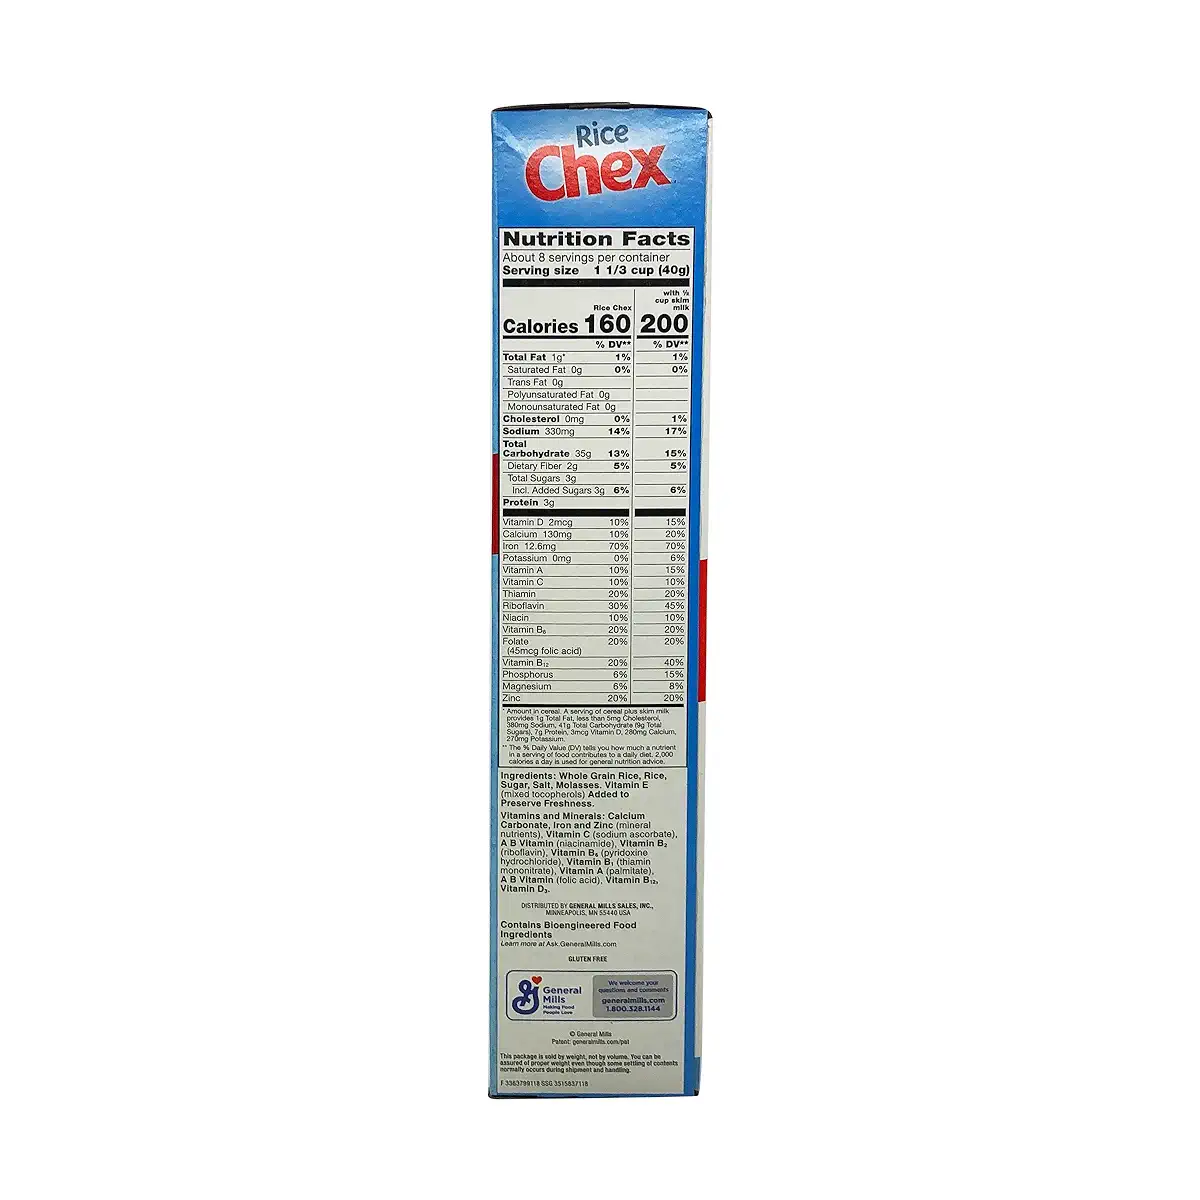

KeyError: 'html'

In [6]:
import sqlite3, requests
from PIL import Image

from bs4 import BeautifulSoup
import json

api_key = "hack-with-upstage-docai-0420"

def analyze_layout(filename):
    url = "https://api.upstage.ai/v1/document-ai/layout-analyzer"
    headers = {"Authorization": f"Bearer {api_key}"}
    files = {"document": open(filename, "rb")}
    response = requests.post(url, headers=headers, files=files)
    return response.json()["html"]


conn = sqlite3.connect('data/food_info.db')

cursor = conn.cursor()

sql_query = "SELECT name, price FROM products;"

cursor.execute(sql_query)

image_names = cursor.fetchall()

food_items = []

for name in image_names:
    path = 'data/'+name[0]+'.jpg'
    im = Image.open(path)
    im.show()
    res = analyze_layout(path)
    print(name[1])
    food_items.append((name[0], name[1], res))
    print(res)

foods= [food_items[0]]

for x in foods:
    
    html = x[2]

    # Parse HTML
    soup = BeautifulSoup(html, 'html.parser')

    # Find relevant elements and extract text
    calories = soup.find('td', string='Calories').find_next_sibling('td').get_text()
    protein = soup.find('td', string='Protein').find_next_sibling('td').get_text()
    servings_per_container = soup.find('td', string='Servings Per Container').find_next_sibling('td').get_text()

    # Construct JSON object
    result = {
        "calories": calories,
        "protein": protein,
        "servings_per_container": servings_per_container
    }

    #Convert to JSON format
    json_result = json.dumps(result, indent=4)
    print(json_result)


cursor.close()
conn.close()

AttributeError: 'str' object has no attribute 'dtype'